In [1]:
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp
from matplotlib.animation import FuncAnimation

In [4]:
# Getting the neutrino model for healpy playing around

model_1 = np.loadtxt("/Users/millermacdonald/Desktop/Research_shit/Summer_2023_Research/GC_calcs/nu_models/second_GC_model.txt", comments="#", unpack=False)
num_nu = int(model_1.size/30)

X, Y, Z = model_1[:, 23], model_1[:, 24], model_1[:, 25]
positions = np.column_stack((X, Y, Z))

bin_size=0.1
num_xbins, num_ybins, num_zbins = int(60/bin_size), int(60/bin_size), int(6/bin_size)
H, edges = np.histogramdd(positions, bins=(num_xbins, num_ybins, num_zbins), range=[(-30, 30), (-30, 30), (-3, 3)])

prob_dens_dist = np.divide(H, num_nu*(bin_size**3))

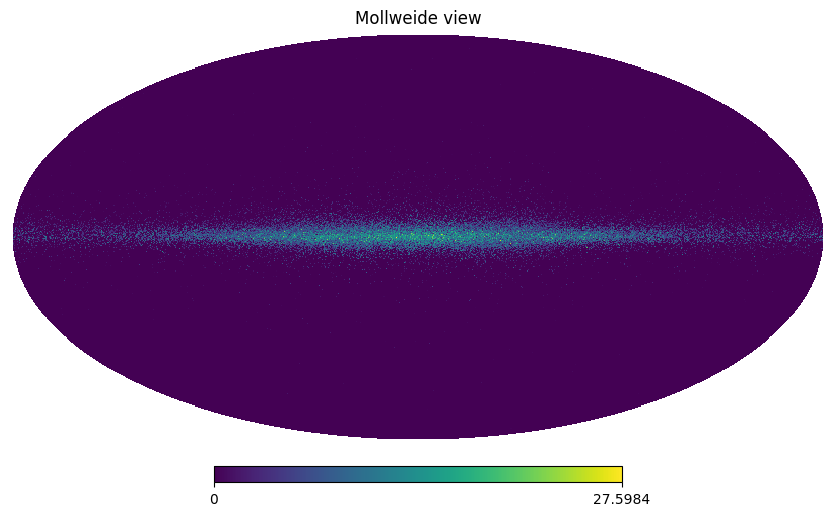

In [5]:
# Calculating some distribution bins

def Galactic(x, y, z):
    r = np.sqrt((8-x)**2 + y**2 + z**2)
    l = np.arctan2(y, (8-x))
    b = np.arcsin(z / r)
    return r, l, b

def Galr(x, y, z):
    return np.sqrt((8-x)**2 + y**2 + z**2)

def Gall(x, y, z):
    return np.arctan2(y, (8-x))

def Galb(x, y, z):
    return np.arcsin(z / (np.sqrt((8-x)**2 + y**2 + z**2)))

rs = Galr(X, Y, Z)
ls = Gall(X, Y, Z)
bs = Galb(X, Y, Z)

thetas = np.subtract(np.pi/2, bs)
phis = ls

nside = 200
pixel_indices = hp.ang2pix(nside, thetas, phis)
m = np.zeros(hp.nside2npix(nside))
m[pixel_indices] = rs
hp.mollview(m)

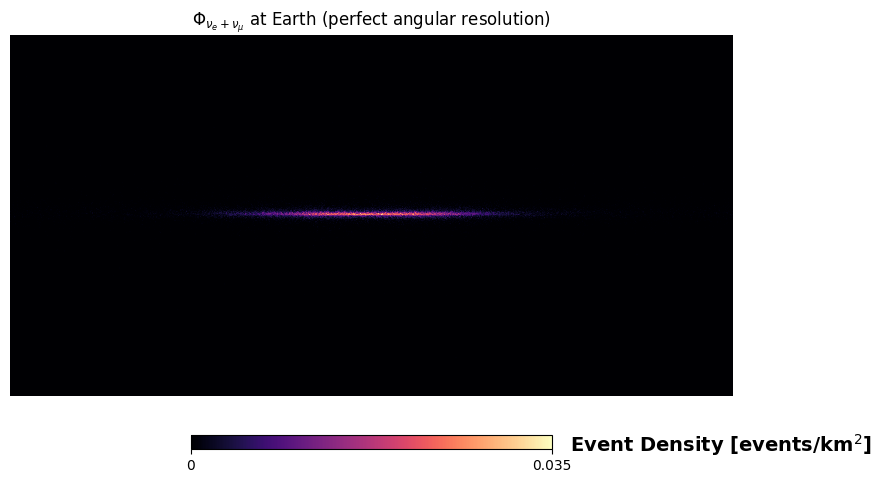

In [52]:
# Flattening over LOS (still playing)

angpos = np.column_stack((thetas, phis))
num_thbins, num_phibins = 1000, 1000
G, edges = np.histogramdd(angpos, bins=(num_thbins, num_phibins), range=[(0, np.pi), (-np.pi, np.pi)])

nside = 150
theta, phi = np.meshgrid(edges[0][:-1], edges[1][:-1])
pixel_indices = hp.ang2pix(nside, theta.flatten(), phi.flatten())

g = []
for i, thval in enumerate(edges[0][:-1]):
    for j, phval in enumerate(edges[1][:-1]):
        g.append(G[j][i]/2517.065208171928) # area of the angular bin on Earth

m = np.zeros(hp.nside2npix(nside))
m[pixel_indices] = g

test = hp.cartview(
    m, 
    title=r"$\Phi_{\nu_e + \nu_{\mu}}$ at Earth (perfect angular resolution)", 
    unit=r"Event Density [events/km$^2$]", 
    min=0,
    max=0.035,
    cmap="magma",
    xsize=2000,
    return_projected_map=True
)
# plt.savefig("test.png")


In [53]:
arr = np.array(test)

sum(sum(arr))

172.57796841722836

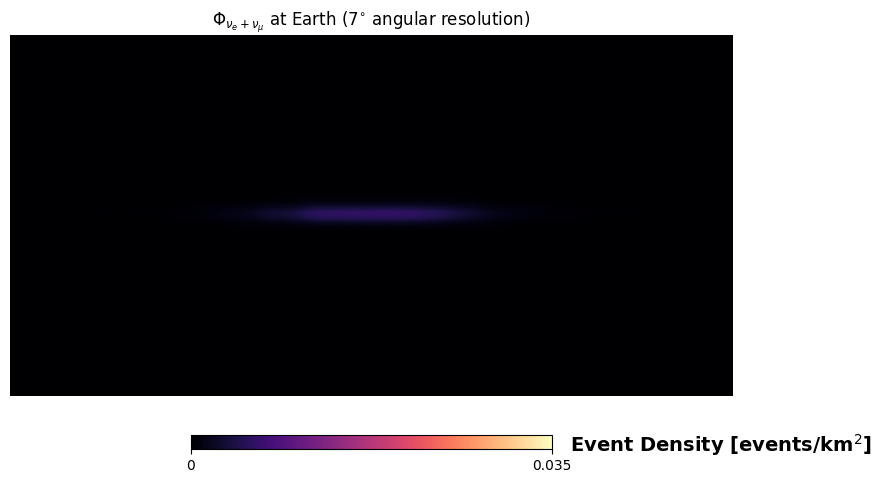

In [36]:
m_smoothed = hp.smoothing(m, fwhm=np.radians(7))

test_smoothed = hp.cartview(
    m_smoothed, 
    title=r"$\Phi_{\nu_e + \nu_{\mu}}$ at Earth ($7^{\circ}$ angular resolution)", 
    unit=r"Event Density [events/km$^2$]", 
    min=0,
    max=0.035,
    cmap="magma",
    return_projected_map=True
)

In [35]:
arr_smoothed = np.array(test_smoothed)

sum(sum(arr_smoothed))

27.593493905140598

In [8]:
# Loading in the real data

ebins = np.loadtxt("/Users/millermacdonald/Desktop/Research_shit/Summer_2023_Research/GC_calcs/misc_data/prelim_allsky_edists/ebins_2_143.txt", unpack=False)
log_es = np.loadtxt("/Users/millermacdonald/Desktop/Research_shit/Summer_2023_Research/GC_calcs/misc_data/log_energy_bins.txt", unpack=False)

In [9]:
# Defining pixels and angles

nside = 150
npix = hp.nside2npix(nside)
thedges = np.arange(0, np.pi, 0.07)
phedges = np.arange(-np.pi, np.pi, 0.07)
theta, phi = np.meshgrid(thedges, phedges)
pixel_indices = hp.ang2pix(nside, theta.flatten(), phi.flatten())

In [10]:
# Function that returns map at specific energy bin

def dist(index):

    bin = ebins[index].reshape(45, 90)
    log_e = round(log_es[index], 3)

    e = []
    for i, thval in enumerate(thedges):
        for j, phval in enumerate(phedges):
            e.append(bin[i][j])

    E = np.zeros(hp.nside2npix(nside))
    E[pixel_indices] = e
    print(E.shape)

    E0_smoothed = hp.smoothing(E, fwhm=np.radians(7.))
    hp.mollview(
        E0_smoothed, 
        title=f"Event distributions (log E = {log_e})",
        cmap="magma",
        min=0,
        return_projected_map=True
    )

In [6]:
from PIL import Image
import os

In [11]:
# Function that returns map at specific energy bin

def dist(index):

    bin = ebins[index].reshape(45, 90)
    log_e = round(log_es[index], 3)

    e = []
    for i, thval in enumerate(thedges):
        for j, phval in enumerate(phedges):
            e.append(bin[i][j])

    E = np.zeros(hp.nside2npix(nside))
    E[pixel_indices] = e
    print(E.shape)

    E0_smoothed = hp.smoothing(E, fwhm=np.radians(7.))
    """
    hp.mollview(
        E0_smoothed, 
        title=f"Event distributions (log E = {log_e} TeV)," + r" $\sigma = 0.2$, $\delta m^2 = 10^{-14.3}$ eV$^2$",
        cmap="magma",
        unit=r"[# events / angular bin]",
        min=0,
        max=0.079,
        return_projected_map=True
    )

    if index < 10:
        plt.savefig(f"gif_figs/0{index}_plt.png")
    else:
        plt.savefig(f"gif_figs/{index}_plt.png")
    """
    return E0_smoothed


(270000,)


(400, 800)

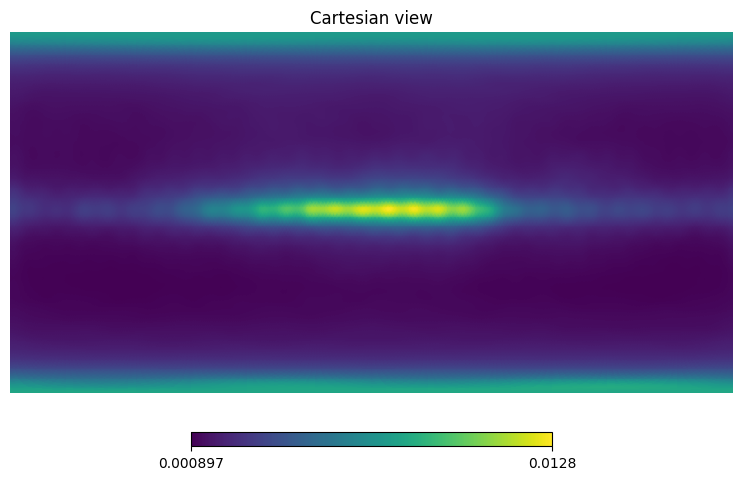

In [12]:
test = hp.cartview(dist(0), return_projected_map=True)
test_array = np.array(test)
test_array.shape

In [169]:
input_directory = "/Users/millermacdonald/Desktop/Research_shit/Summer_2023_Research/GC_calcs/gif_figs"
output_gif = "output_2_143.gif"

In [170]:
# List PNG files in the directory
png_files = sorted([f for f in os.listdir(input_directory) if f.endswith('.png')])

# Create a list to store the images
images = []

# Read and append each PNG file to the list
for png_file in png_files:
    image_path = os.path.join(input_directory, png_file)
    img = Image.open(image_path)
    images.append(img)

# Save the images as a GIF
images[0].save(output_gif, save_all=True, append_images=images[1:], duration=600, loop=0)

In [54]:
data = np.arange(10)
theta = np.radians(np.arange(10, 110, 10))
phi = np.radians(np.linspace(0, 100, 10))

In [55]:
nside = 8
print(np.degrees(hp.nside2resol(nside)))

7.329037678543799


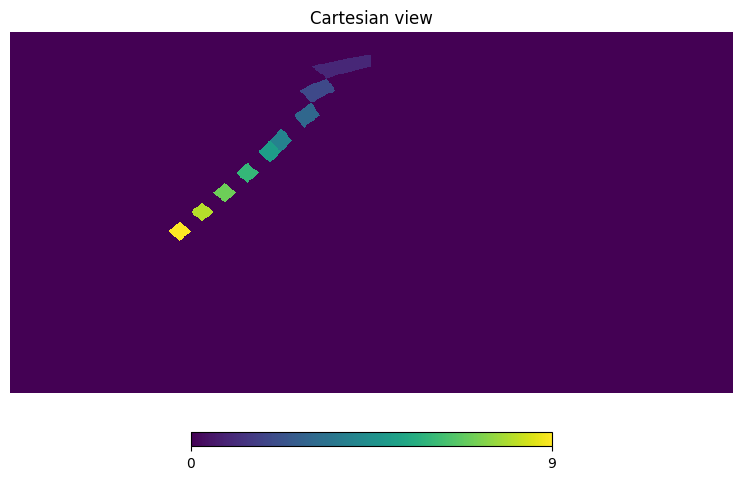

In [83]:
pixel_indices = hp.ang2pix(nside, theta, phi)
m = np.zeros(hp.nside2npix(nside))

m[pixel_indices] = data

m_cartview = hp.cartview(m, xsize=800, return_projected_map=True)

In [94]:
hp.nside2npix(nside)
alm = hp.map2alm(m)

reconstructed_map = hp.alm2map(alm, nside)
sum(reconstructed_map)

array([ 2.07763494e-01+0.00000000e+00j,  9.07390991e-02+0.00000000e+00j,
       -1.11199012e-01+0.00000000e+00j, -5.61275882e-02+0.00000000e+00j,
        5.59579037e-02+0.00000000e+00j,  1.96464083e-03+0.00000000e+00j,
       -4.14015909e-02+0.00000000e+00j,  1.95574486e-02+0.00000000e+00j,
        2.56987339e-02+0.00000000e+00j, -4.41138060e-02+0.00000000e+00j,
       -3.09390916e-02+0.00000000e+00j,  2.19521123e-02+0.00000000e+00j,
        7.92269397e-03+0.00000000e+00j, -1.43903624e-02+0.00000000e+00j,
        1.72582884e-02+0.00000000e+00j,  3.85106847e-03+0.00000000e+00j,
       -4.27561589e-02+0.00000000e+00j, -2.14781327e-02+0.00000000e+00j,
        3.42628382e-02+0.00000000e+00j,  1.58499949e-02+0.00000000e+00j,
       -6.75212838e-03+0.00000000e+00j,  5.57888640e-03+0.00000000e+00j,
       -1.55519933e-02+0.00000000e+00j, -5.57018534e-02+0.00000000e+00j,
       -7.04916250e-02+2.01373068e-01j, -8.05683273e-02+7.02676561e-02j,
       -3.04195788e-02-9.31362232e-02j,  1.62250312